Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


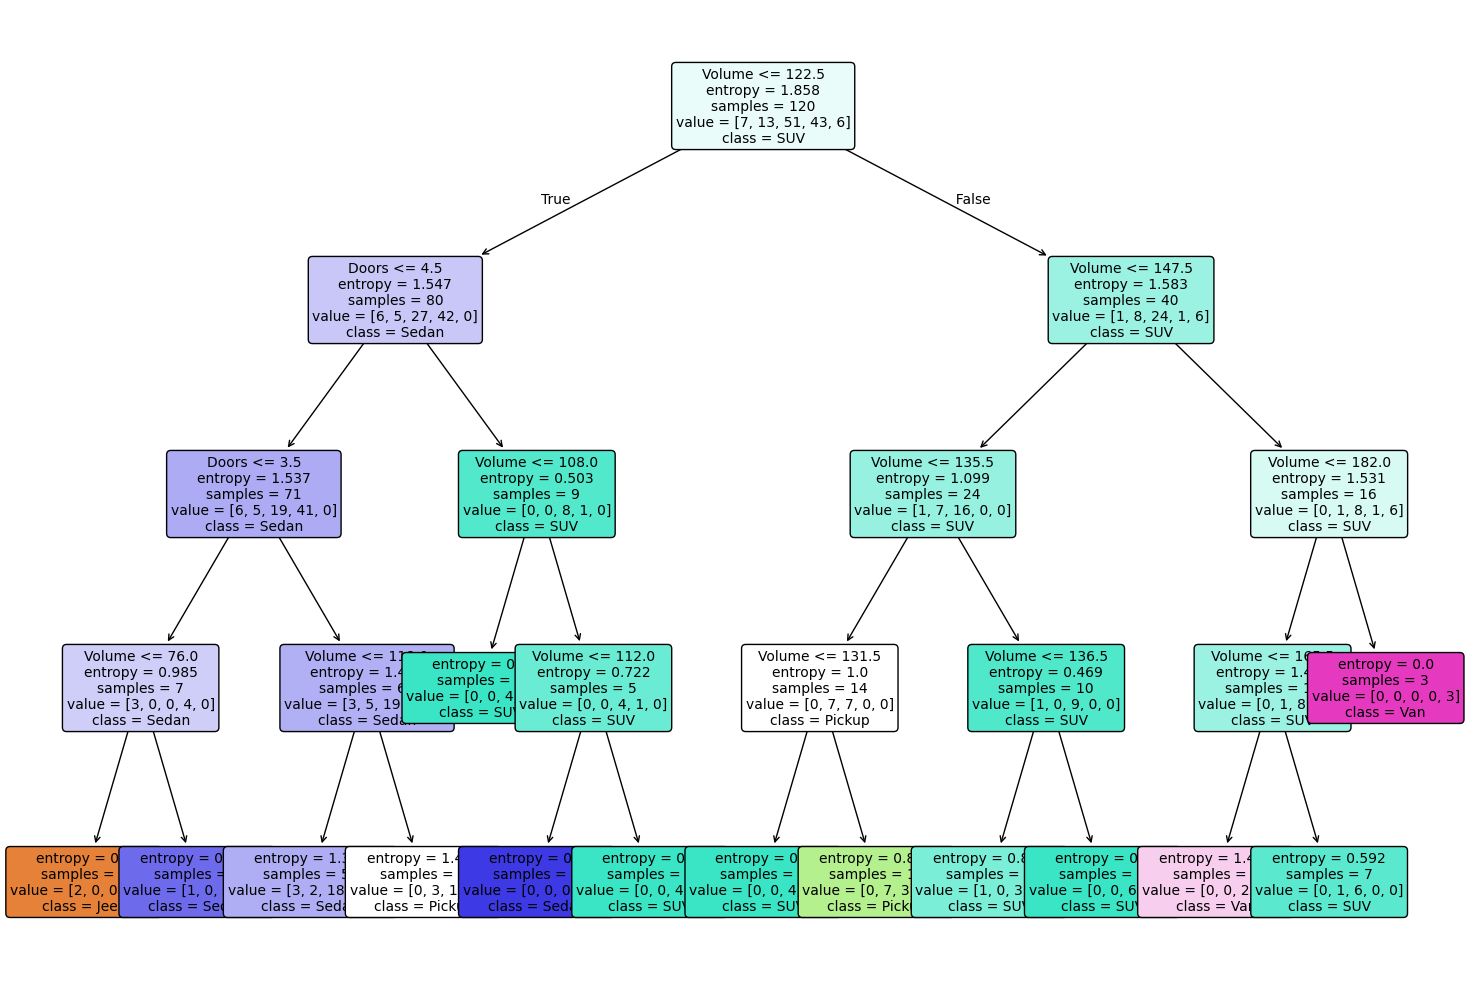

Saved decision tree image as /content/drive/MyDrive/Colab Notebooks/TreeCars.png
Test on testing data
Expected classes
['SUV', 'SUV', 'SUV', 'SUV', 'Sedan', 'Sedan', 'Sedan', 'Sedan', 'SUV', 'SUV', 'SUV', 'Pickup', 'Sedan', 'Jeep', 'Sedan', 'SUV', 'Sedan', 'Pickup', 'Sedan', 'Sedan', 'Pickup', 'Sedan', 'SUV', 'Jeep', 'Sedan', 'SUV', 'Van', 'SUV', 'SUV', 'SUV']
Predicted classes
['Pickup', 'SUV', 'Pickup', 'Sedan', 'Sedan', 'Sedan', 'Sedan', 'Sedan', 'Pickup', 'SUV', 'SUV', 'Pickup', 'Sedan', 'Pickup', 'Sedan', 'SUV', 'Sedan', 'SUV', 'Sedan', 'Sedan', 'Pickup', 'Sedan', 'SUV', 'Sedan', 'Sedan', 'SUV', 'Van', 'Sedan', 'SUV', 'Sedan']
Accuracy: 0.70
Saved /content/drive/MyDrive/Colab Notebooks/TreeCars.csv


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

#--------------------------------------------------------------------------------------------------
def get_car_data():
    """
    Reads AllCars.csv and returns:
      features_train, classes_train, features_test, classes_test, feature_names, class_names, test_df
    """
    file_name = "/content/drive/MyDrive/Colab Notebooks/AllCars.csv"

    df = pd.read_csv(file_name)

    # ---- Required columns
    required = ["Volume", "Doors", "Style"]
    missing = [c for c in required if c not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns {missing}. Found columns: {list(df.columns)}")

    # ---- Clean types
    df["Volume"] = pd.to_numeric(df["Volume"], errors="coerce")
    df["Doors"]  = pd.to_numeric(df["Doors"], errors="coerce")
    df["Style"]  = df["Style"].astype(str)

    # ---- Drop rows with missing Volume/Doors/Style
    df = df.dropna(subset=["Volume", "Doors", "Style"]).reset_index(drop=True)

    # ---- Features and classes
    feature_names = ["Volume", "Doors"]
    class_names = sorted(df["Style"].unique().tolist())  # alphabetical

    features = df[feature_names].to_numpy()
    classes = df["Style"].tolist()

    # ---- Split 80/20 randomly, stratify to keep style balance
    features_train, features_test, classes_train, classes_test, df_train, df_test = train_test_split(
        features,
        classes,
        df,
        test_size=0.20,
        random_state=1,
        stratify=classes
    )

    return features_train, classes_train, features_test, classes_test, feature_names, class_names, df_test

#--------------------------------------------------------------------------------------------------
def get_data(which):

    if which == "cars":
        return get_car_data()
    else:
        return None

#--------------------------------------------------------------------------------------------------
#----Learn decision tree
def learn_tree(features_train, classes_train, criterion, max_depth):

    decision_tree = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        random_state=1
    )

    #----Train the Decision Tree model on the training data
    decision_tree.fit(features_train, classes_train)

    return decision_tree

#--------------------------------------------------------------------------------------------------
def visualise_tree(decision_tree, feature_names, class_names, out_png_name="TreeCars.png"):

    plt.figure(figsize=(15,10))
    plot_tree(
        decision_tree,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        fontsize=10
    )
    plt.tight_layout()
    plt.savefig(out_png_name, dpi=200)
    plt.show()
    plt.close()
    print(f"Saved decision tree image as {out_png_name}")

#--------------------------------------------------------------------------------------------------
def save_treecars_csv(df_test, classes_predicted, accuracy, out_csv_name="TreeCars.csv"):
    """
    Create TreeCars.csv for testing set only:
      Volume, Doors, Style, PredictedStyle
    Add a final row at bottom with accuracy.
    """

    out_df = df_test[["Volume", "Doors", "Style"]].copy()
    out_df["PredictedStyle"] = classes_predicted

    # ---- Accuracy row at bottom
    accuracy_row = pd.DataFrame([{
        "Volume": "",
        "Doors": "",
        "Style": "ACCURACY",
        "PredictedStyle": accuracy
    }])

    out_df = pd.concat([out_df, accuracy_row], ignore_index=True)
    out_df.to_csv(out_csv_name, index=False)

    print(f"Saved {out_csv_name}")

#--------------------------------------------------------------------------------------------------
def print_predictions(classes_test, classes_predicted, accuracy, class_names):

    print(f"Expected classes\n{classes_test}\nPredicted classes\n{classes_predicted}")
    print(f"Accuracy: {accuracy:.2f}")

#--------------------------------------------------------------------------------------------------
def main():

    features_train, classes_train, features_test, classes_test, feature_names, class_names, df_test = \
        get_data("cars")

    #----Learn the tree (entropy is common; max_depth optional)
    decision_tree = learn_tree(features_train, classes_train, "entropy", max_depth=4)

    #----Save decision tree image to TreeCars.png
    visualise_tree(decision_tree, feature_names, class_names,
        out_png_name="/content/drive/MyDrive/Colab Notebooks/TreeCars.png")

    #----Predict on testing data (required)
    classes_predicted = decision_tree.predict(features_test).tolist()
    accuracy = accuracy_score(classes_test, classes_predicted)

    print("Test on testing data")
    print_predictions(classes_test, classes_predicted, accuracy, class_names)

    #----Create TreeCars.csv with bottom accuracy row
    save_treecars_csv(df_test, classes_predicted, accuracy,
        out_csv_name="/content/drive/MyDrive/Colab Notebooks/TreeCars.csv")
#--------------------------------------------------------------------------------------------------
if __name__ == "__main__":
    main()
#--------------------------------------------------------------------------------------------------
